Load the libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

In [ ]:
path="/ENB2012_data.xlsx"

In [ ]:

energy_df=pd.read_excel(path)

In [ ]:
energy_df

The dataset contains 8 independent variables (X1 to X8) and 2 dependent variables (Y1 and Y2).

In [ ]:
#target variables
#energy_df['Y1']=energy_df.target
#preview
energy_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


EDA

<Axes: >

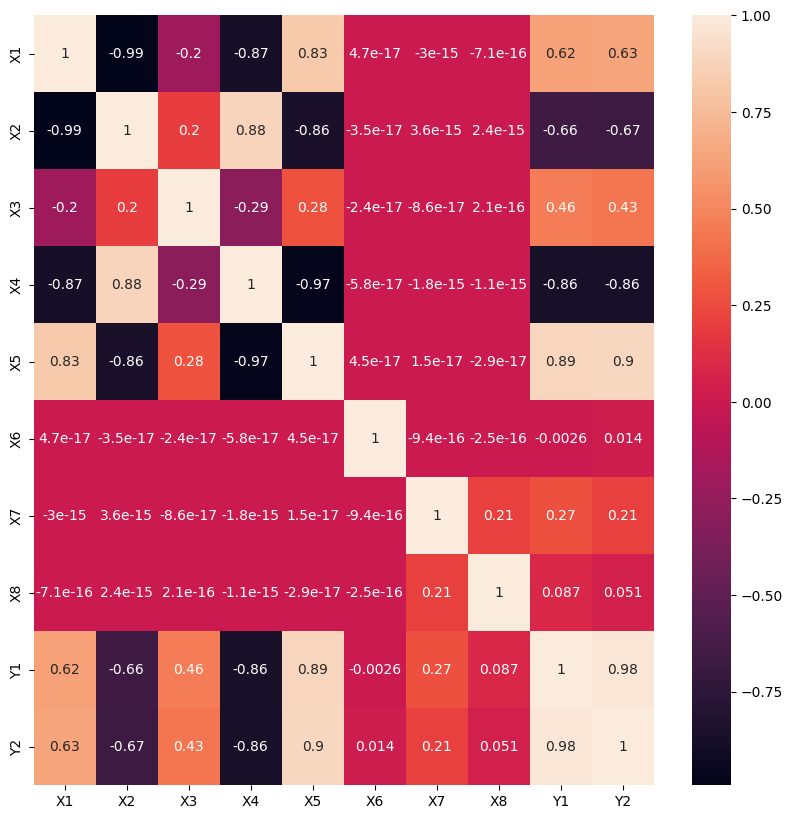

In [ ]:
#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(energy_df.corr(), annot = True)

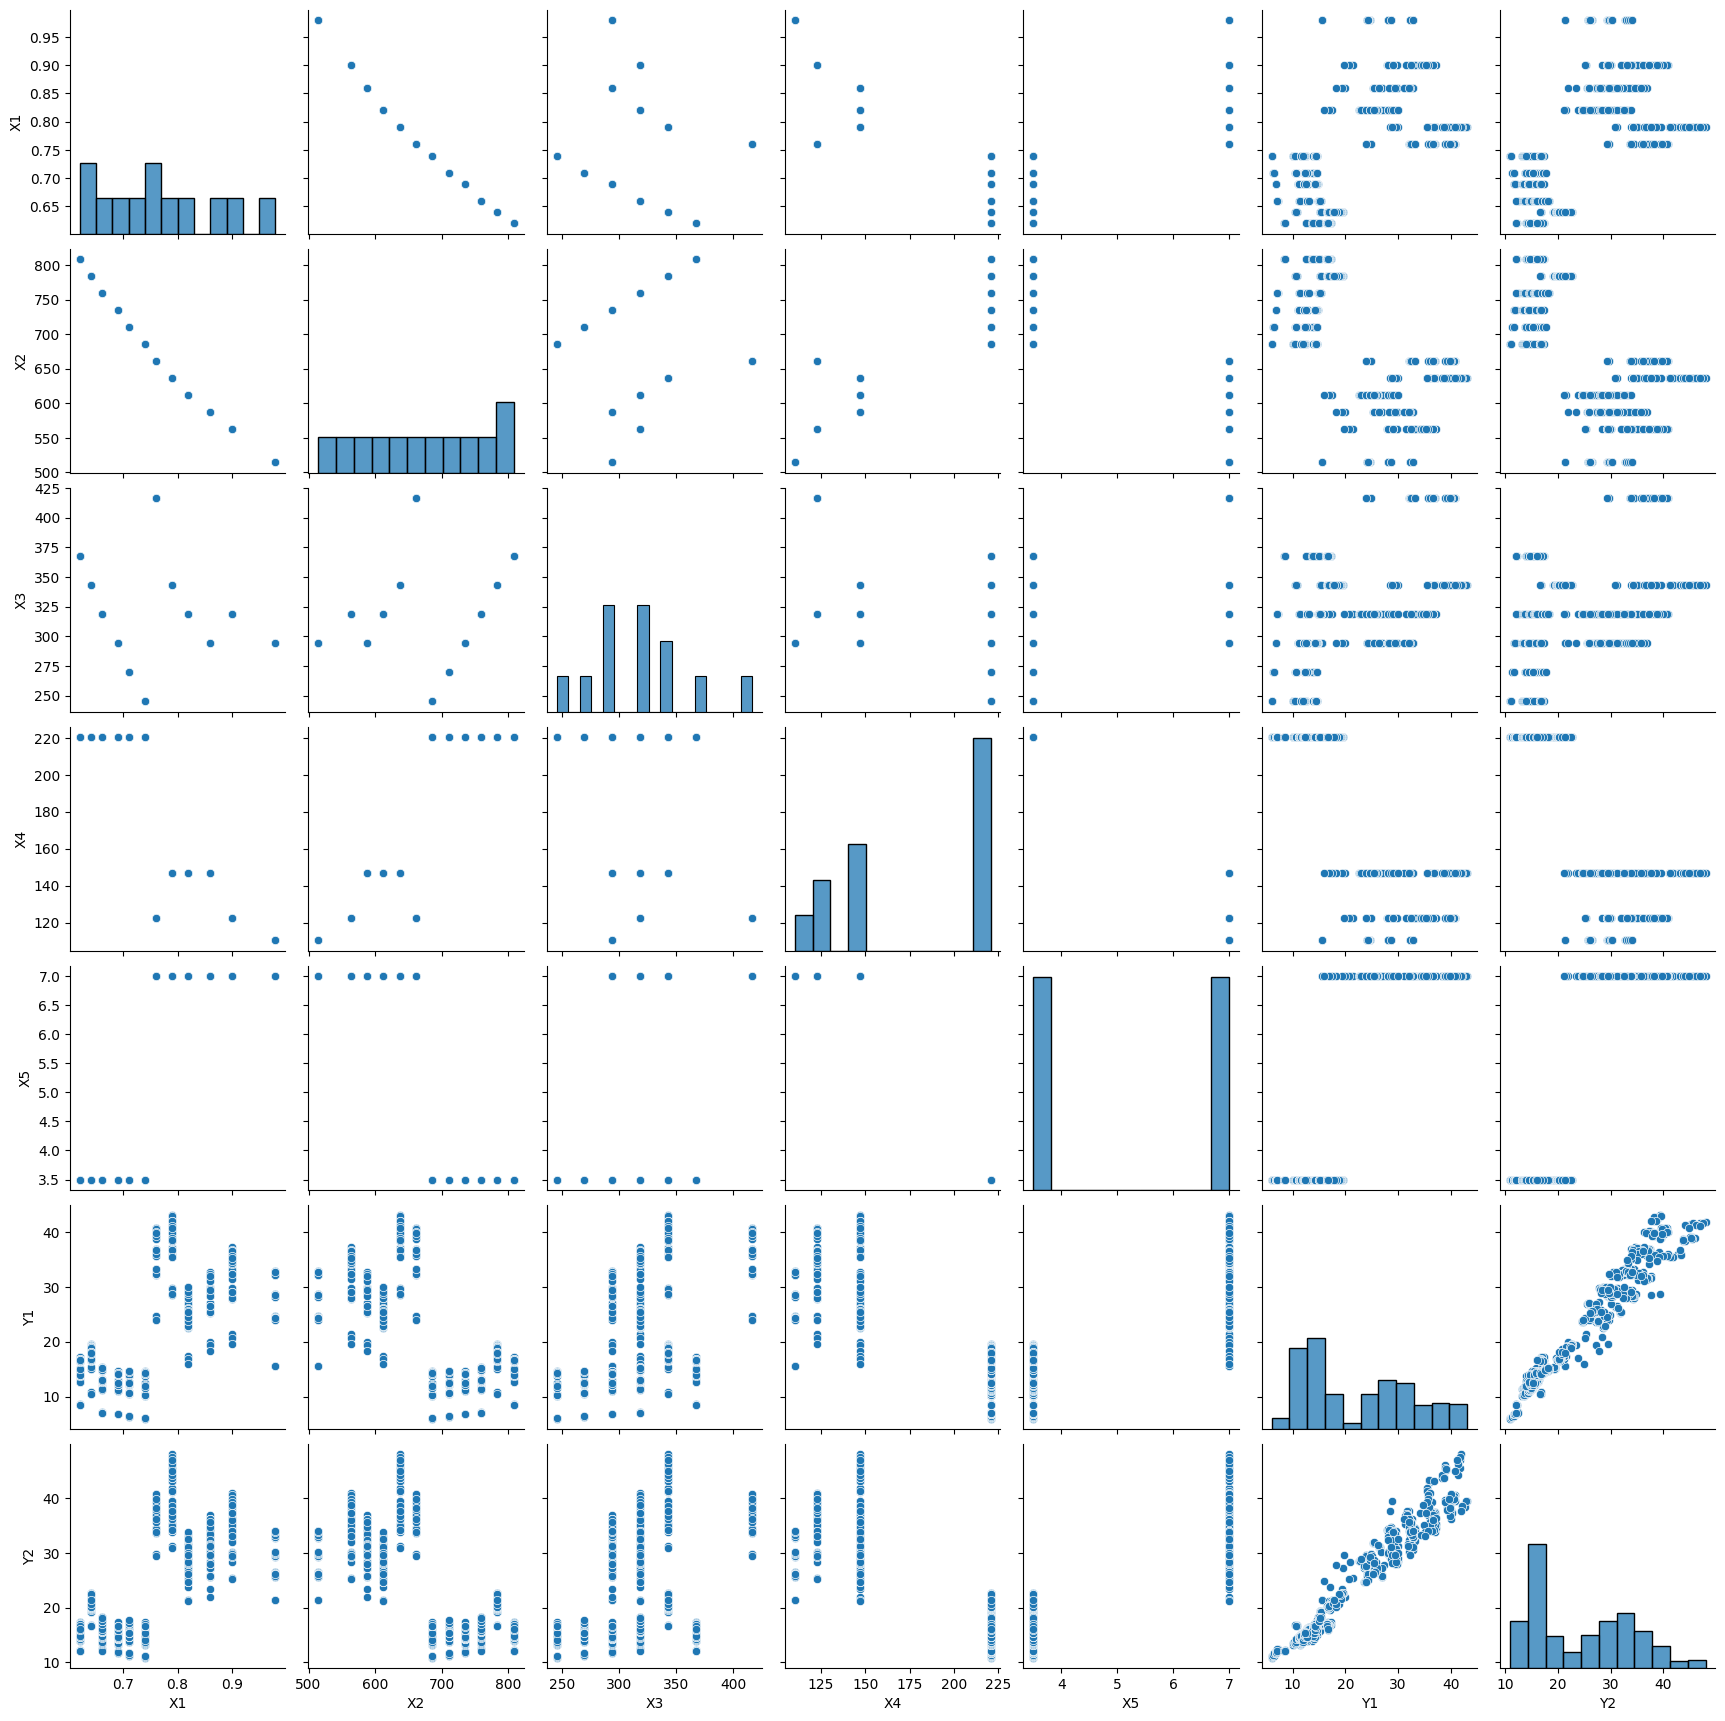

In [ ]:
#There are cases of multicolinearity, we will drop a few columns
energy_df.drop(columns = ["X6", "X7","X8"], inplace = True)

#pairplot
sns.pairplot(energy_df)

#we will log the X4 Column
energy_df.X4 = np.log(energy_df.X4)

Ridge Regression: Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. This term is the sum of squares of coefficient multiplied by the parameter The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. This term is called L2 regularization.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

Data Splitting and Scaling

In [ ]:
features = energy_df.columns[0:11]
target = energy_df.columns[-1]

#X and y values
X = energy_df[features].values
y = energy_df[target].values

from sklearn.model_selection import train_test_split
#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'energy_df' is not defined

A linear and a ridge regression model are buitd and then compared the coefficients in a plot. The score of the train and test sets will also help us evaluate how well the model performs

In [ ]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("\nLinear Regression Model \n")
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model \n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Linear Regression Model 

The train score for lr model is 1.0
The test score for lr model is 1.0

Ridge Model 

The train score for ridge model is 0.99729791895845
The test score for ridge model is 0.99721060768176



Using an alpha value of 10, the evaluation of the model, the train, and test data indicate better performance on the ridge model than on the linear regression model.

We can also plot the coefficients for both the linear and ridge models

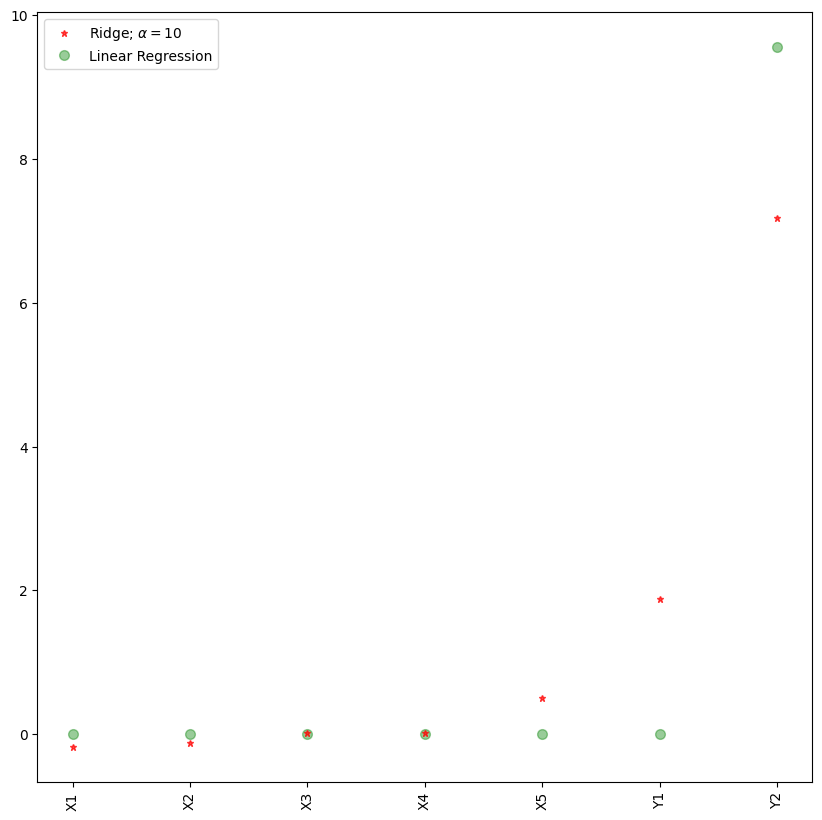

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Lasso Regression This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

Lasso Regression for Regularization In this shrinkage technique, the coefficients determined in the linear model that are shrunk towards the central point as the mean by introducing a penalization factor called the alpha α (or sometimes lamda) values.

Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. With alpha set to zero, you will find that this is the equivalent of the linear regression model, and a larger value penalizes the optimization function. Therefore, lasso regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.

Alpha (α) can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is.

In [ ]:
#Lasso regression model

lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("\nLasso Model\n")
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model

The train score for ls model is 0.0
The test score for ls model is -0.0005130876534189532


Visualize the coefficients


<Axes: >

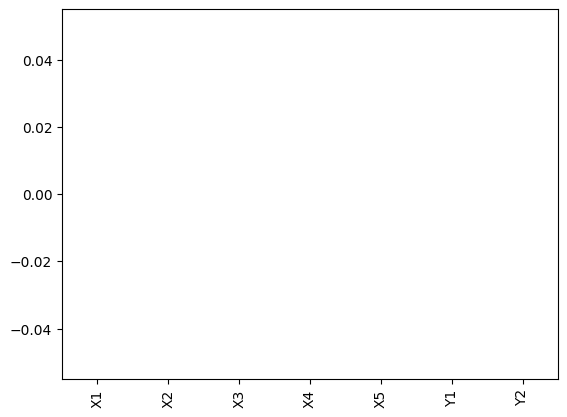

In [ ]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")

Selecting Optimal Alpha Values Using Cross-Validation in Sklearn

We may need to try out different alpha values to find the optimal constraint value. For this case, we can use the cross-validation model in the sklearn package. This will try out different combinations of alpha values and then choose the best model.

In [ ]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.999999773545917
0.9999997804496347


The model will be trained on different alpha values that I have specified in the LassoCV function. We can observe a better performance of the model, removing the tedious effort of manually changing alpha values.

We can compare the coefficients from the lasso model with the rest of the models (linear and ridge).

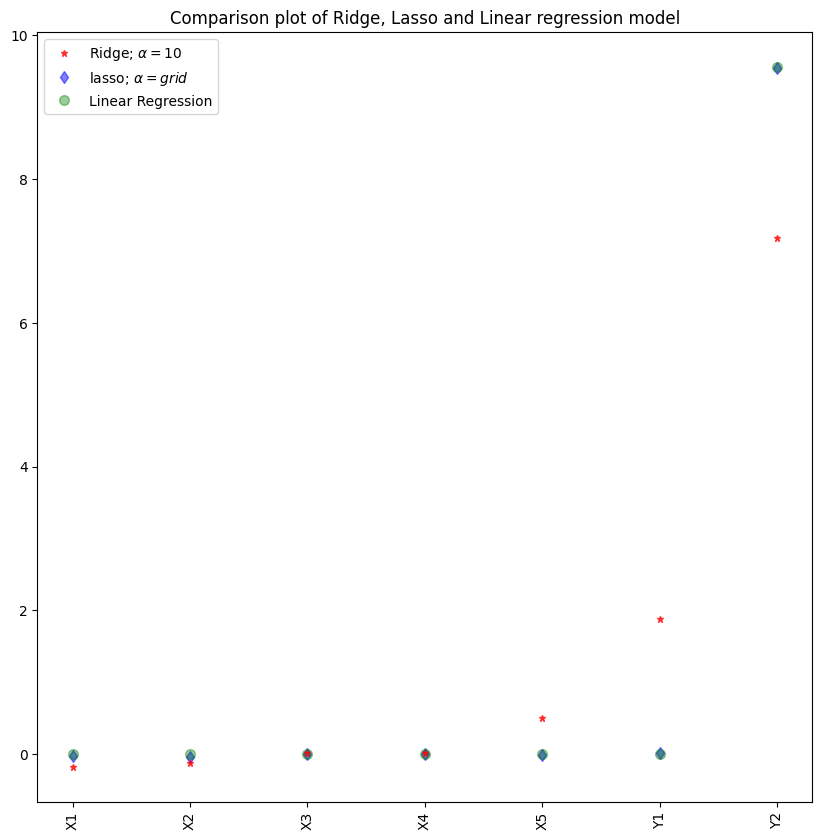

In [ ]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',
         zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

A similar approach could be employed for the ridge regression model, which could lead to better results. In the sklearn package, the function RidgeCV performs similarly.

In [ ]:
#Using the linear CV model
'''from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))'''

NameError: name 'X_train' is not defined